# Building your first model in keras and get it ready for mobile use
> Learning how to build your first tensorflow model using keras and how to get a file that you can use in your mobile device

- toc:true
- branch: master
- badges: true
- comments: true
- author: Juan Cruz Alric
- categories: [deep-learning, jupyter, tensorflow, keras, machine_learning]

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

import pathlib
import matplotlib.pyplot as plt

import numpy as np

We are going to create a basic model of the form y=mx+b

In [76]:
x = []
for i in range(-5,10):
    x.append(i)

In [77]:
x

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [78]:
y = []
for i in range(len(x)):
    y.append((x[i] * 2) - 1)

In [79]:
y

[-11, -9, -7, -5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15, 17]

In [80]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [81]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])

In [82]:
model.fit(
    x=x,
    y=y,
    epochs=200
)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 231.3291 - mse: 231.3291
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 69.1295 - mse: 69.1295
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 21.2743 - mse: 21.2743
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 7.1351 - mse: 7.1351
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 2.9382 - mse: 2.9382
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 1.6736 - mse: 1.6736
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 1.2746 - mse: 1.2746
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 1.1317 - mse: 1.1317
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 1.0650 - mse: 1.0650
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 1.0217 - mse: 1.0217
Epoch 11/200
1/1 [==============================] - 0s 3ms/step - loss:

Now that we have the model we can generate a SavedModel

In [83]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


INFO:tensorflow:Assets written to: saved_model/1/assets


Convert the SavedModel to TFLite

In [84]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [85]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

776

Load TFLite model and allocate tensors

In [86]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

Get input and output tensors

In [87]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

Test the Tensorflow Lite model on random input data

In [89]:
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    # Test the Tensorflow model on random input
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

Visualize the model

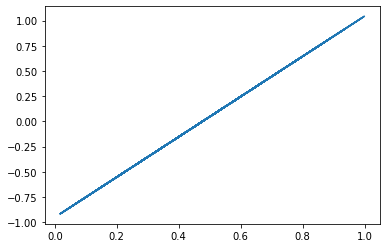

In [90]:
plt.plot(inputs, outputs)
plt.show()